<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#实验说明" data-toc-modified-id="实验说明-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>实验说明</a></span></li><li><span><a href="#数据说明" data-toc-modified-id="数据说明-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据说明</a></span><ul class="toc-item"><li><span><a href="#数据集说明" data-toc-modified-id="数据集说明-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>数据集说明</a></span></li><li><span><a href="#数据处理" data-toc-modified-id="数据处理-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>数据处理</a></span></li></ul></li><li><span><a href="#代码实现" data-toc-modified-id="代码实现-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>代码实现</a></span></li><li><span><a href="#参考文献" data-toc-modified-id="参考文献-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>参考文献</a></span></li></ul></div>

# 实验说明

本实验基于`sklearn`中的`KNN`分类器实现数字识别，数据来源于[GitHub](https://github.com/Asia-Lee/KNN/)。数字资源不需要特殊处理，可直接使用，便于初学者使用。

# 数据说明

  ## 数据集说明
  需要识别的数字已经使用图形处理软件，处理成具有相同的色彩和大小：宽高是32像素x32像素的黑白图像。尽管采用本文格式存储图像不能有效地利用内存空间，但是为了方便理解，在数据存储式任然保存为文本格式，对于初学者而言，有利于实验的进行，在掌握算法原理之后就能将这个模型进行扩展，添加其他的模块，如图像处理模块、数据分析模块等。

  数据集中的所有数据均能从实验说明中的[GitHub](https://github.com/Asia-Lee/KNN/)中获取，这些文本格式存储的数字的文件命名也很有特点，格式为：数字的值_该数字的样本序号。
  
  ## 数据处理
  在KNN模型中每一个样本的数据不能做为矩阵输入，应将每个数字文件中32\*32的二进制图像矩阵转换为1*1024的向量，作为一个样本输入。随后就能使用`KNeighborsClassifier` 分类器进行分类。

# 代码实现

In [1]:
import numpy as np
from skimage import io
from os import listdir
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
"""
function :将32x32的二进制图像转换为1x1024向量
Parament:
    filename : 文件名
Return:
    returnVect : 1 * 1024的向量
"""
def img2vector(filename):
    #创建1x1024零向量
    returnVect = np.zeros((1, 1024))
    #打开文件
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    #返回转换后的1x1024向量
    return returnVect

In [12]:
"""
function :将32x32的二进制图像转换为1x32向量
Parament:
    filename : 文件名
Return:
    returnVect : 1 * 1024的向量
"""
def img2vectorBySum(filename):
    #创建1x32零向量
    returnVect = np.zeros((1, 32))
    #打开文件
    fr = open(filename)
    #按行读取
    for i in range(32):
        #读一行数据
        lineStr = fr.readline()
        #每一行的前32个元素依次添加到returnVect中
        sum = 0
        for j in range(32):
            sum += int(lineStr[j])
        returnVect[0, i] = sum
    #返回转换后的1x32向量
    return returnVect

In [13]:
'''
function : 读取fileName指定的文件夹，并显示为图像
Parament:
    fileName : 需要显示为图像的文件名    
'''
def ShowTxtPicture(fileName):
    image = np.zeros((32, 32))
    fr = open(fileName) 
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            image[i,j] = int(lineStr[j])

    plt.figure("Image")
    # 这里必须加 cmap='gray' ,否则尽管原图像是灰度图（下图1），但是显示的是伪彩色图像（下图2）（如果不加的话）
    plt.imshow(image,cmap='gray')
    plt.axis('on')
    plt.title('image')
    plt.show()

In [14]:
"""
function :手写数字分类测试
"""
def handwritingClassTest():
    #训练集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('./KNN-master/trainingDigits')
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,训练集
    trainingMat = np.zeros((m, 1024))
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vector('./KNN-master/trainingDigits/%s' % (fileNameStr))
    #构建kNN分类器
    neigh =KNN(n_neighbors = 3, algorithm = 'auto')
    # 拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    # 返回testDigits目录下的文件列表
    testFileList = listdir('./KNN-master/testDigits')
    # 错误检测计数
    errorCount = 0.0
    # 测试数据的数量
    mTest = len(testFileList)
    # 从文件中解析出测试集的类别并进行 分类测试
    for i in range(mTest):
        fileNameStr = testFileList[i] # 获得文件的名字
        classNumber = int(fileNameStr.split('_')[0]) # 获得分类的数字
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('./KNN-master/testDigits/%s' % (fileNameStr))
        #获得预测结果
        classifierResult = neigh.predict(vectorUnderTest)
        # print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        if(classifierResult != classNumber):
            ShowTxtPicture('./KNN-master/testDigits/%s' % (fileNameStr))
            print("预测为：", classifierResult,  "文件名为 ： ", fileNameStr )            
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

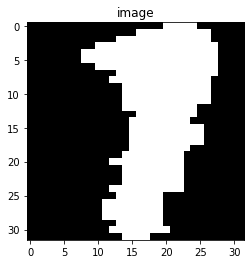

预测为： [7] 文件名为 ：  1_86.txt


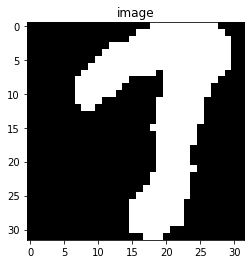

预测为： [9] 文件名为 ：  3_11.txt


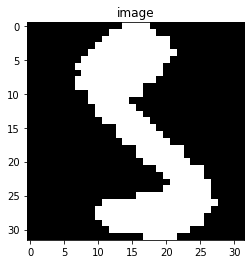

预测为： [3] 文件名为 ：  5_42.txt


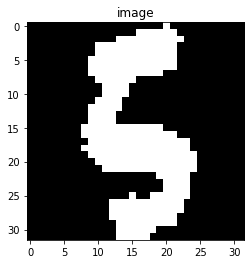

预测为： [6] 文件名为 ：  5_43.txt


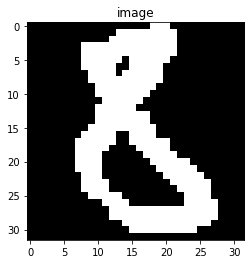

预测为： [6] 文件名为 ：  8_11.txt


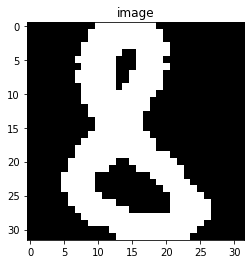

预测为： [3] 文件名为 ：  8_23.txt


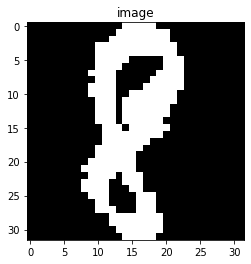

预测为： [1] 文件名为 ：  8_36.txt


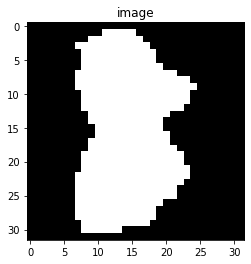

预测为： [1] 文件名为 ：  8_45.txt


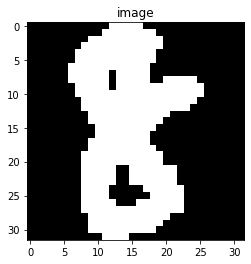

预测为： [1] 文件名为 ：  8_68.txt


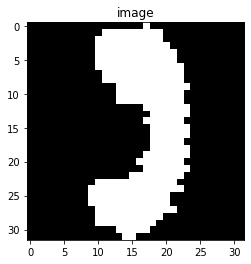

预测为： [1] 文件名为 ：  9_14.txt


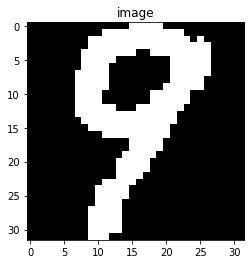

预测为： [7] 文件名为 ：  9_60.txt


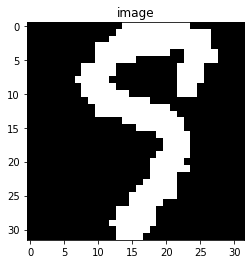

预测为： [5] 文件名为 ：  9_68.txt
总共错了12个数据
错误率为1.268499%


In [15]:
# 运行程序，查看结果
handwritingClassTest()

In [16]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [17]:
"""
function :手写数字分类测试
"""
def handwritingClassTestByCART():
    #训练集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('./KNN-master/trainingDigits')
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,训练集
    trainingMat = np.zeros((m, 1024))
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x1024数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vector('./KNN-master/trainingDigits/%s' % (fileNameStr))
    #构建决策树分类器
    neigh = DecisionTreeClassifier(criterion = 'gini')
    # 拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    # 返回testDigits目录下的文件列表
    testFileList = listdir('./KNN-master/testDigits')
    # 错误检测计数
    errorCount = 0.0
    # 测试数据的数量
    mTest = len(testFileList)
    # 从文件中解析出测试集的类别并进行 分类测试
    for i in range(mTest):
        fileNameStr = testFileList[i] # 获得文件的名字
        classNumber = int(fileNameStr.split('_')[0]) # 获得分类的数字
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vector('./KNN-master/testDigits/%s' % (fileNameStr))
        #获得预测结果
        classifierResult = neigh.predict(vectorUnderTest)
        # print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        if(classifierResult != classNumber):
            ShowTxtPicture('./KNN-master/testDigits/%s' % (fileNameStr))
            print("预测为：", classifierResult,  "文件名为 ： ", fileNameStr )            
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

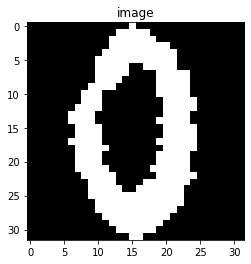

预测为： [5] 文件名为 ：  0_21.txt


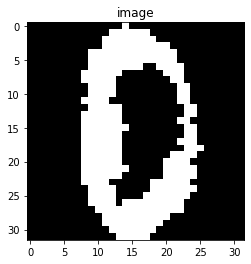

预测为： [5] 文件名为 ：  0_63.txt


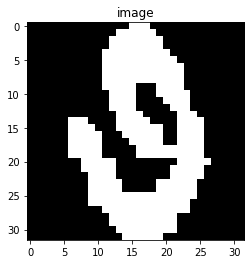

预测为： [4] 文件名为 ：  0_84.txt


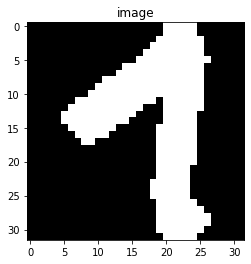

预测为： [9] 文件名为 ：  1_16.txt


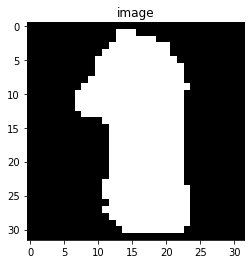

预测为： [4] 文件名为 ：  1_42.txt


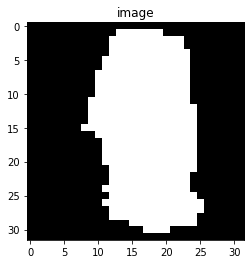

预测为： [4] 文件名为 ：  1_45.txt


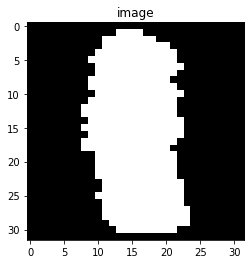

预测为： [4] 文件名为 ：  1_46.txt


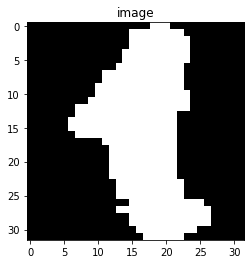

预测为： [4] 文件名为 ：  1_5.txt


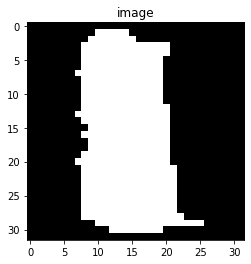

预测为： [8] 文件名为 ：  1_62.txt


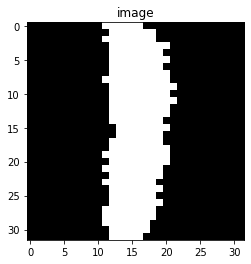

预测为： [7] 文件名为 ：  1_71.txt


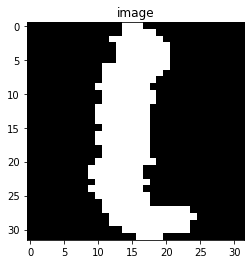

预测为： [6] 文件名为 ：  1_73.txt


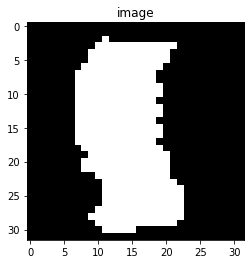

预测为： [6] 文件名为 ：  1_80.txt


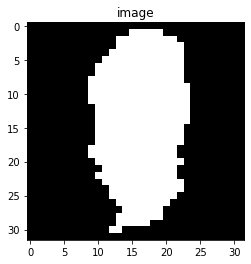

预测为： [4] 文件名为 ：  1_82.txt


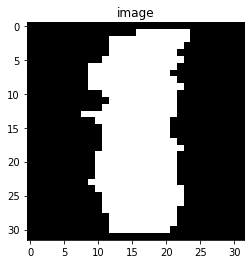

预测为： [8] 文件名为 ：  1_88.txt


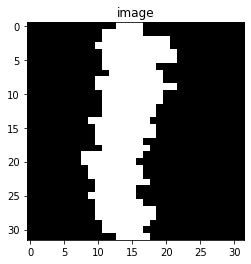

预测为： [8] 文件名为 ：  1_92.txt


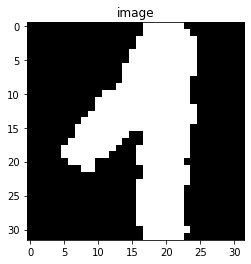

预测为： [4] 文件名为 ：  1_95.txt


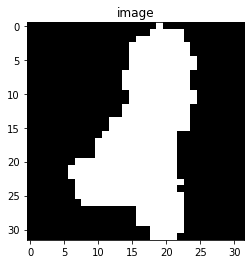

预测为： [6] 文件名为 ：  1_96.txt


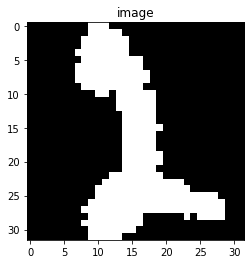

预测为： [3] 文件名为 ：  2_27.txt


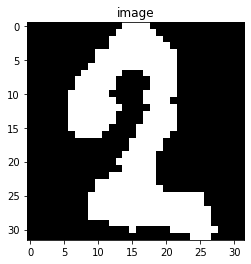

预测为： [9] 文件名为 ：  2_38.txt


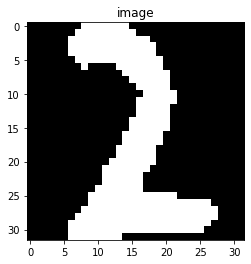

预测为： [1] 文件名为 ：  2_41.txt


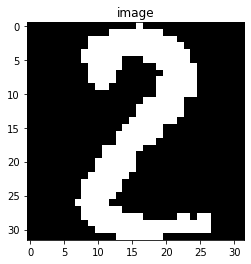

预测为： [9] 文件名为 ：  2_67.txt


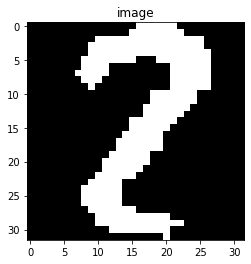

预测为： [8] 文件名为 ：  2_68.txt


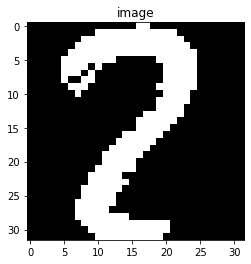

预测为： [7] 文件名为 ：  2_69.txt


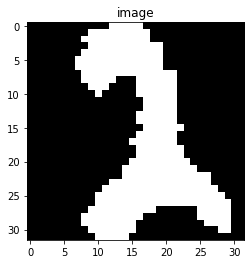

预测为： [3] 文件名为 ：  2_7.txt


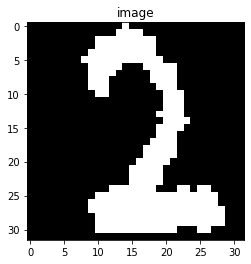

预测为： [3] 文件名为 ：  2_74.txt


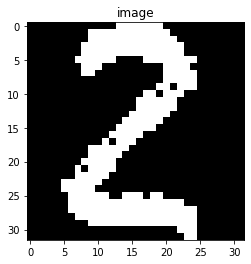

预测为： [8] 文件名为 ：  2_8.txt


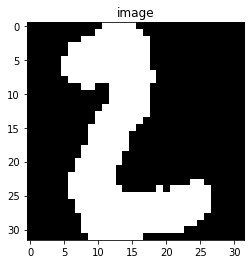

预测为： [6] 文件名为 ：  2_83.txt


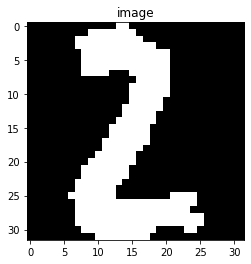

预测为： [8] 文件名为 ：  2_86.txt


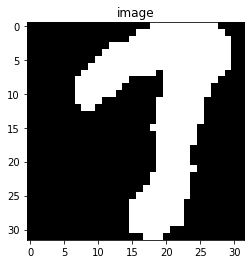

预测为： [9] 文件名为 ：  3_11.txt


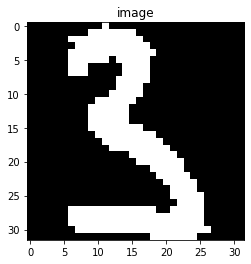

预测为： [6] 文件名为 ：  3_21.txt


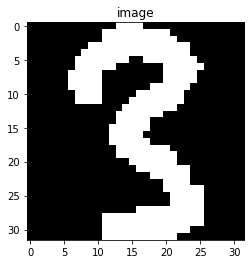

预测为： [1] 文件名为 ：  3_29.txt


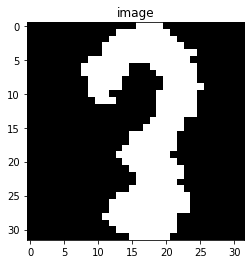

预测为： [1] 文件名为 ：  3_43.txt


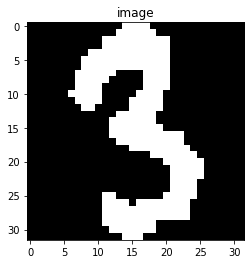

预测为： [1] 文件名为 ：  3_44.txt


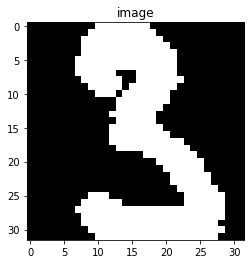

预测为： [2] 文件名为 ：  3_47.txt


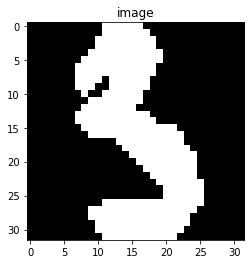

预测为： [1] 文件名为 ：  3_48.txt


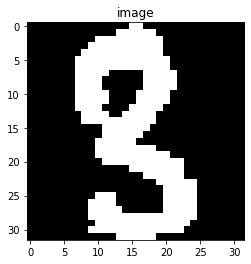

预测为： [9] 文件名为 ：  3_49.txt


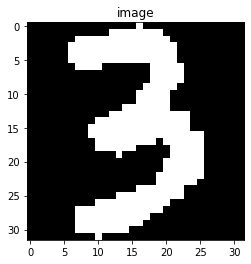

预测为： [9] 文件名为 ：  3_70.txt


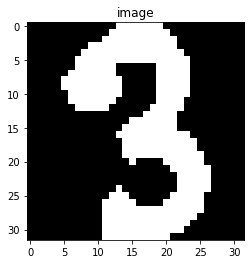

预测为： [1] 文件名为 ：  3_72.txt


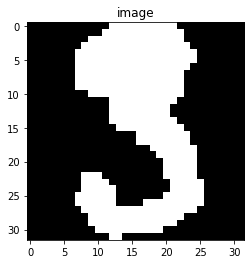

预测为： [5] 文件名为 ：  3_80.txt


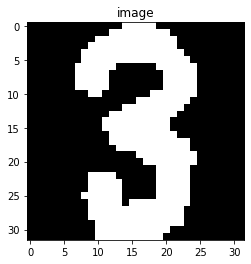

预测为： [8] 文件名为 ：  3_84.txt


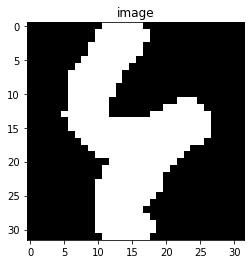

预测为： [3] 文件名为 ：  4_105.txt


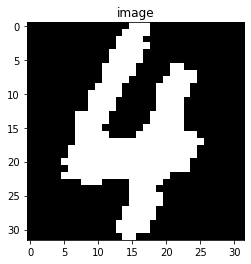

预测为： [7] 文件名为 ：  4_17.txt


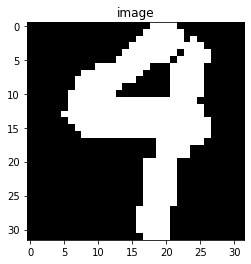

预测为： [9] 文件名为 ：  4_2.txt


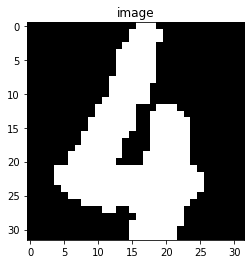

预测为： [8] 文件名为 ：  4_26.txt


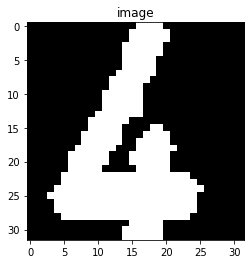

预测为： [6] 文件名为 ：  4_28.txt


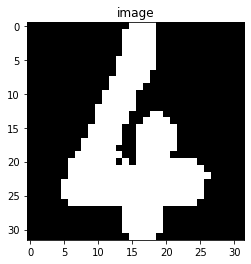

预测为： [6] 文件名为 ：  4_30.txt


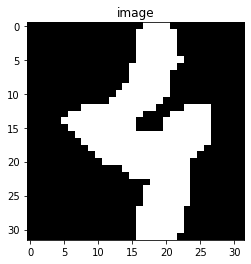

预测为： [1] 文件名为 ：  4_33.txt


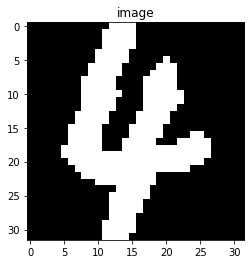

预测为： [7] 文件名为 ：  4_40.txt


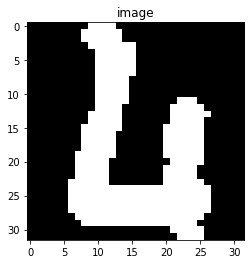

预测为： [0] 文件名为 ：  4_46.txt


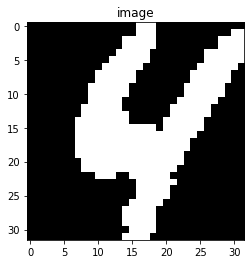

预测为： [9] 文件名为 ：  4_50.txt


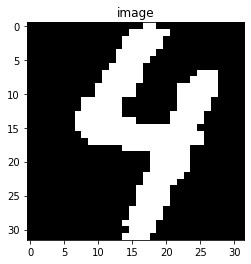

预测为： [1] 文件名为 ：  4_60.txt


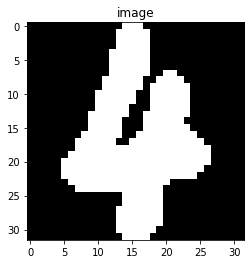

预测为： [1] 文件名为 ：  4_63.txt


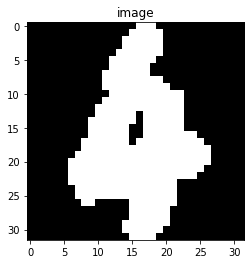

预测为： [1] 文件名为 ：  4_67.txt


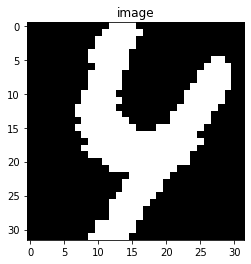

预测为： [5] 文件名为 ：  4_79.txt


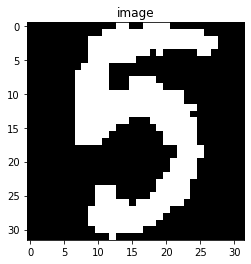

预测为： [9] 文件名为 ：  5_0.txt


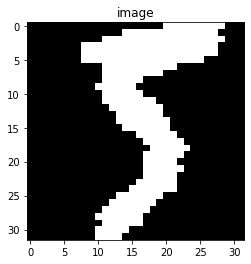

预测为： [9] 文件名为 ：  5_101.txt


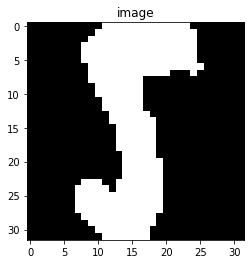

预测为： [3] 文件名为 ：  5_19.txt


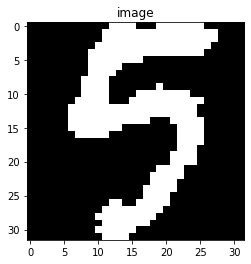

预测为： [4] 文件名为 ：  5_2.txt


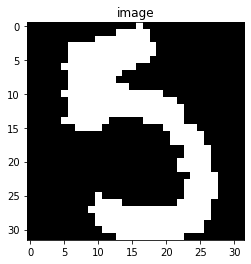

预测为： [2] 文件名为 ：  5_29.txt


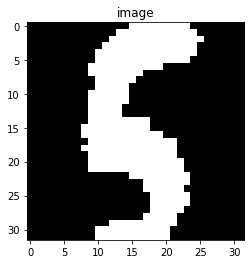

预测为： [4] 文件名为 ：  5_44.txt


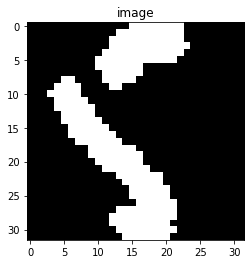

预测为： [2] 文件名为 ：  5_72.txt


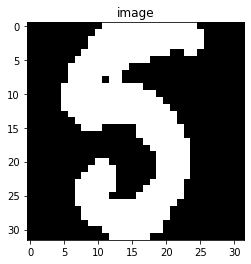

预测为： [8] 文件名为 ：  5_88.txt


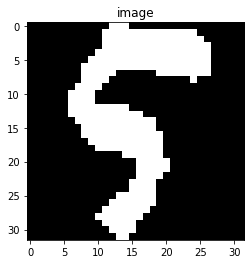

预测为： [7] 文件名为 ：  5_97.txt


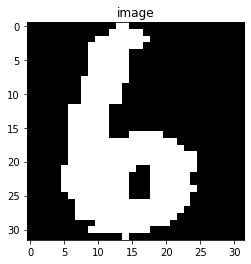

预测为： [4] 文件名为 ：  6_21.txt


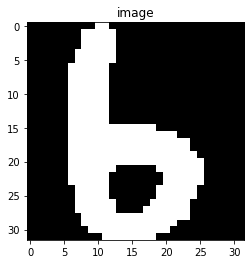

预测为： [2] 文件名为 ：  6_59.txt


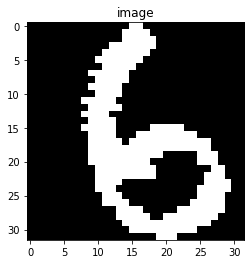

预测为： [1] 文件名为 ：  6_67.txt


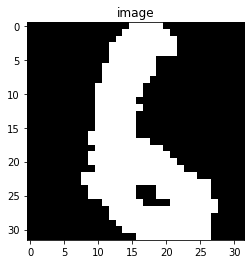

预测为： [5] 文件名为 ：  6_75.txt


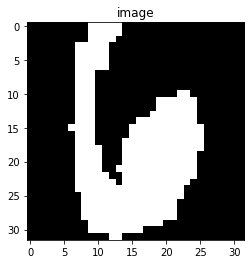

预测为： [0] 文件名为 ：  6_82.txt


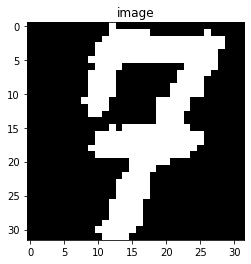

预测为： [9] 文件名为 ：  7_27.txt


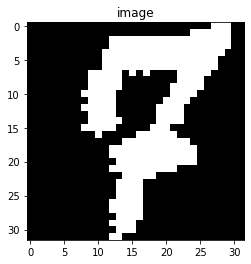

预测为： [9] 文件名为 ：  7_46.txt


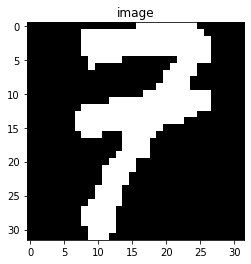

预测为： [5] 文件名为 ：  7_49.txt


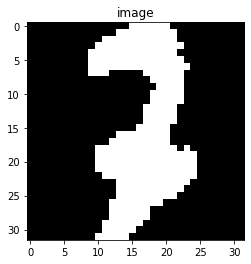

预测为： [3] 文件名为 ：  7_56.txt


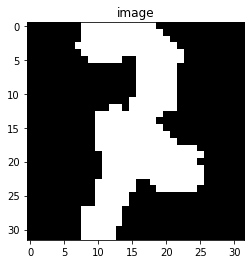

预测为： [3] 文件名为 ：  7_60.txt


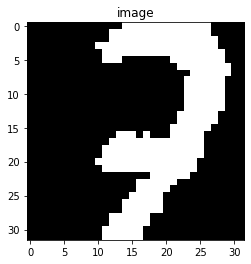

预测为： [5] 文件名为 ：  7_95.txt


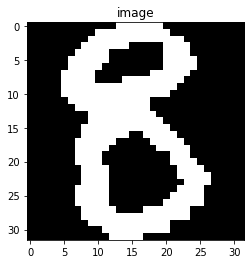

预测为： [2] 文件名为 ：  8_1.txt


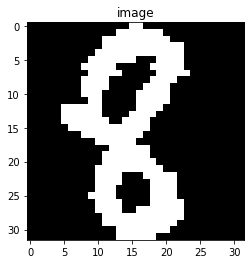

预测为： [9] 文件名为 ：  8_10.txt


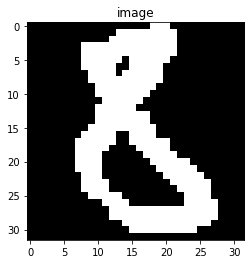

预测为： [4] 文件名为 ：  8_11.txt


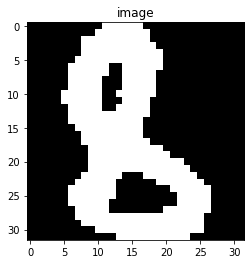

预测为： [2] 文件名为 ：  8_20.txt


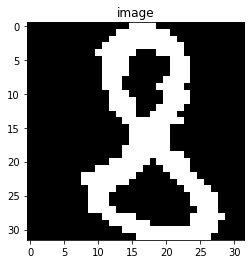

预测为： [7] 文件名为 ：  8_22.txt


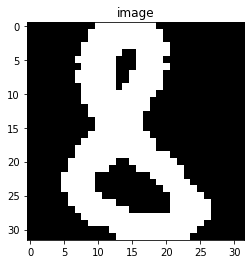

预测为： [7] 文件名为 ：  8_23.txt


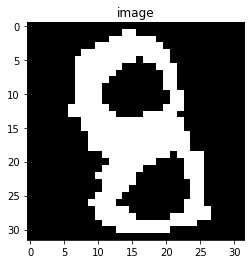

预测为： [9] 文件名为 ：  8_34.txt


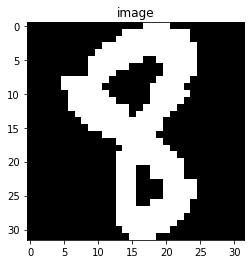

预测为： [7] 文件名为 ：  8_4.txt


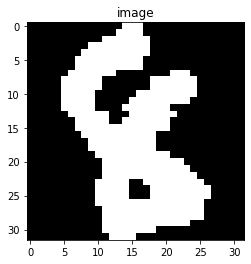

预测为： [2] 文件名为 ：  8_46.txt


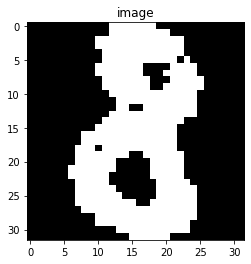

预测为： [2] 文件名为 ：  8_56.txt


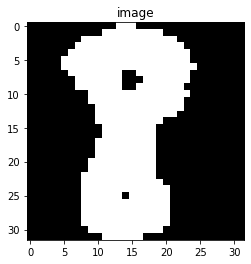

预测为： [1] 文件名为 ：  8_62.txt


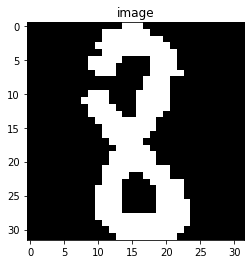

预测为： [9] 文件名为 ：  8_67.txt


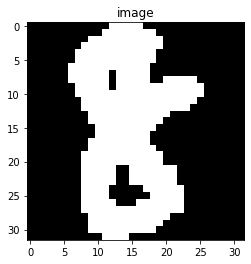

预测为： [1] 文件名为 ：  8_68.txt


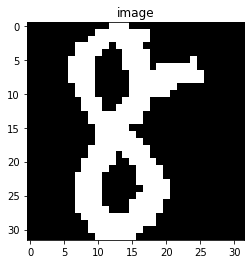

预测为： [7] 文件名为 ：  8_79.txt


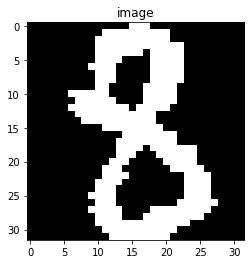

预测为： [1] 文件名为 ：  8_8.txt


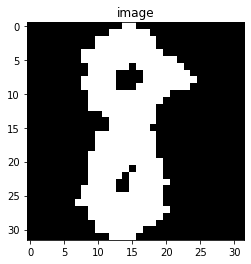

预测为： [1] 文件名为 ：  8_80.txt


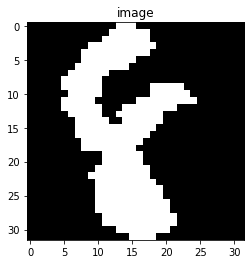

预测为： [2] 文件名为 ：  8_83.txt


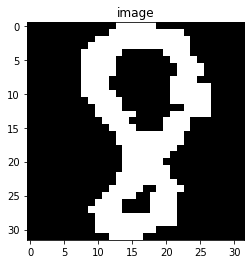

预测为： [9] 文件名为 ：  8_89.txt


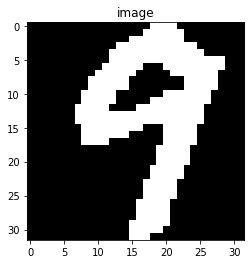

预测为： [4] 文件名为 ：  9_0.txt


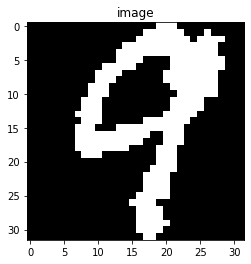

预测为： [4] 文件名为 ：  9_1.txt


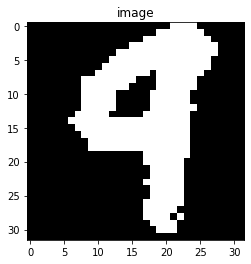

预测为： [4] 文件名为 ：  9_10.txt


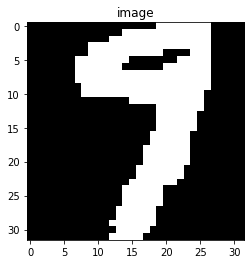

预测为： [7] 文件名为 ：  9_13.txt


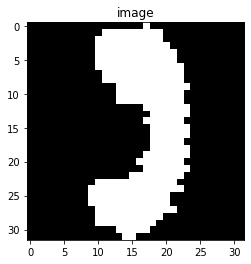

预测为： [2] 文件名为 ：  9_14.txt


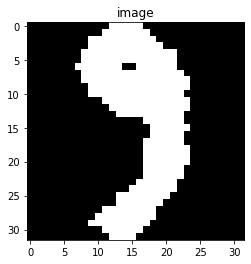

预测为： [7] 文件名为 ：  9_16.txt


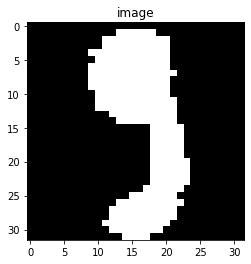

预测为： [1] 文件名为 ：  9_17.txt


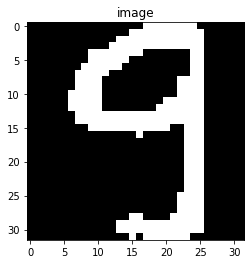

预测为： [4] 文件名为 ：  9_18.txt


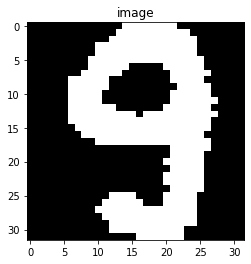

预测为： [4] 文件名为 ：  9_19.txt


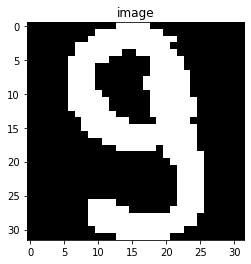

预测为： [1] 文件名为 ：  9_31.txt


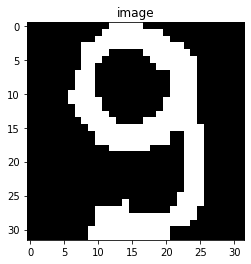

预测为： [1] 文件名为 ：  9_35.txt


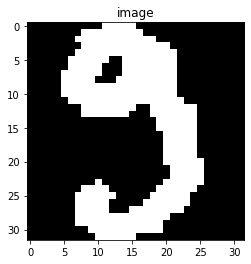

预测为： [5] 文件名为 ：  9_40.txt


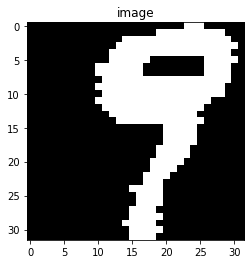

预测为： [5] 文件名为 ：  9_43.txt


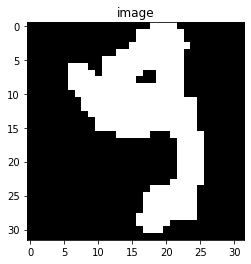

预测为： [1] 文件名为 ：  9_44.txt


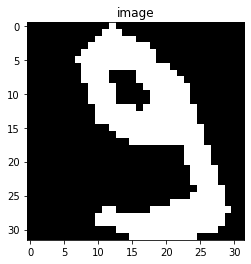

预测为： [2] 文件名为 ：  9_53.txt


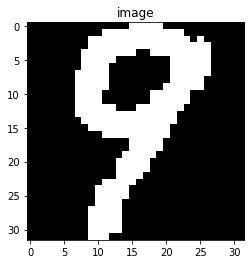

预测为： [8] 文件名为 ：  9_60.txt


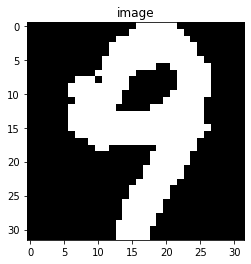

预测为： [4] 文件名为 ：  9_64.txt


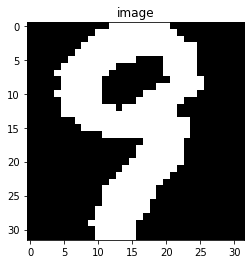

预测为： [7] 文件名为 ：  9_67.txt


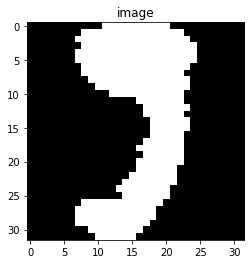

预测为： [7] 文件名为 ：  9_78.txt


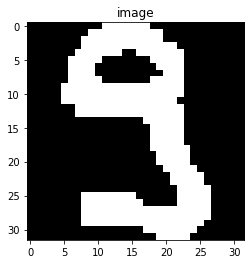

预测为： [1] 文件名为 ：  9_81.txt


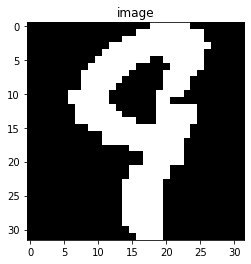

预测为： [7] 文件名为 ：  9_9.txt
总共错了113个数据
错误率为11.945032%


In [18]:
handwritingClassTestByCART()

In [21]:
"""
function :手写数字分类测试
"""
def handwritingClassTestByCART_SUM():
    #训练集的Labels
    hwLabels = []
    #返回trainingDigits目录下的文件名
    trainingFileList = listdir('./KNN-master/trainingDigits')
    #返回文件夹下文件的个数
    m = len(trainingFileList)
    #初始化训练的Mat矩阵,训练集
    trainingMat = np.zeros((m, 32))
    #从文件名中解析出训练集的类别
    for i in range(m):
        #获得文件的名字
        fileNameStr = trainingFileList[i]
        #获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        #将获得的类别添加到hwLabels中
        hwLabels.append(classNumber)
        #将每一个文件的1x32数据存储到trainingMat矩阵中
        trainingMat[i,:] = img2vectorBySum('./KNN-master/trainingDigits/%s' % (fileNameStr))
    #构建决策树分类器
    neigh = DecisionTreeClassifier(criterion = 'gini')
    # 拟合模型, trainingMat为训练矩阵,hwLabels为对应的标签
    neigh.fit(trainingMat, hwLabels)
    # 返回testDigits目录下的文件列表
    testFileList = listdir('./KNN-master/testDigits')
    # 错误检测计数
    errorCount = 0.0
    # 测试数据的数量
    mTest = len(testFileList)
    # 从文件中解析出测试集的类别并进行 分类测试
    for i in range(mTest):
        fileNameStr = testFileList[i] # 获得文件的名字
        classNumber = int(fileNameStr.split('_')[0]) # 获得分类的数字
        #获得测试集的1x1024向量,用于训练
        vectorUnderTest = img2vectorBySum('./KNN-master/testDigits/%s' % (fileNameStr))
        #获得预测结果
        classifierResult = neigh.predict(vectorUnderTest)
        # print("分类返回结果为%d\t真实结果为%d" % (classifierResult, classNumber))
        if(classifierResult != classNumber):
            ShowTxtPicture('./KNN-master/testDigits/%s' % (fileNameStr))
            print("预测为：", classifierResult,  "文件名为 ： ", fileNameStr )            
            errorCount += 1.0
    print("总共错了%d个数据\n错误率为%f%%" % (errorCount, errorCount/mTest * 100))

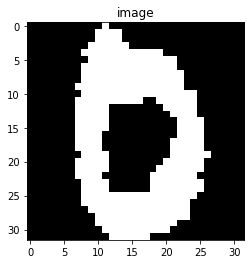

预测为： [1] 文件名为 ：  0_10.txt


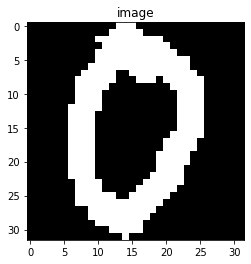

预测为： [1] 文件名为 ：  0_19.txt


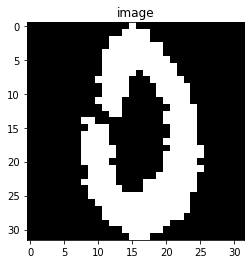

预测为： [8] 文件名为 ：  0_20.txt


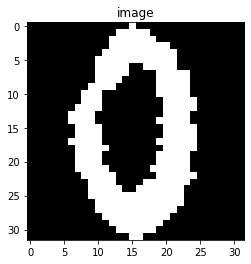

预测为： [1] 文件名为 ：  0_21.txt


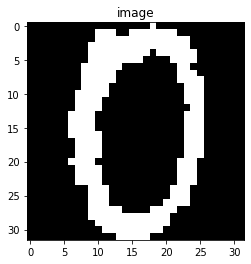

预测为： [3] 文件名为 ：  0_25.txt


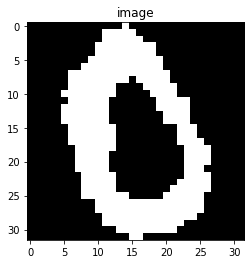

预测为： [1] 文件名为 ：  0_35.txt


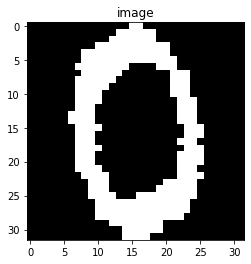

预测为： [2] 文件名为 ：  0_38.txt


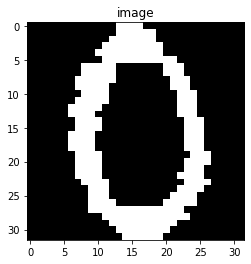

预测为： [5] 文件名为 ：  0_39.txt


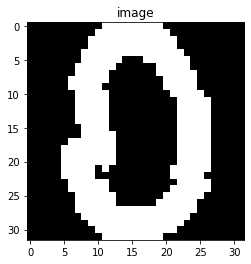

预测为： [8] 文件名为 ：  0_41.txt


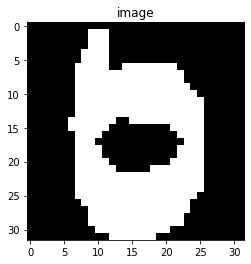

预测为： [1] 文件名为 ：  0_47.txt


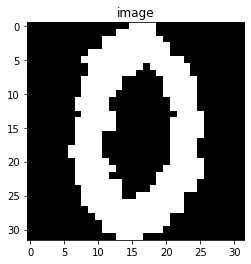

预测为： [6] 文件名为 ：  0_52.txt


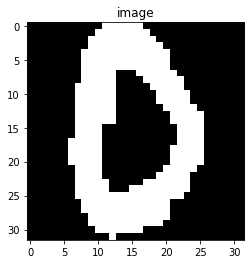

预测为： [8] 文件名为 ：  0_54.txt


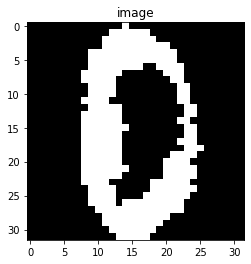

预测为： [6] 文件名为 ：  0_63.txt


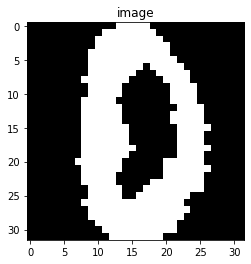

预测为： [8] 文件名为 ：  0_64.txt


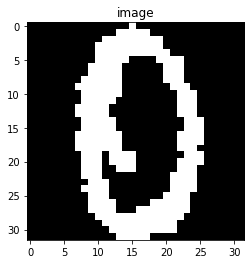

预测为： [8] 文件名为 ：  0_66.txt


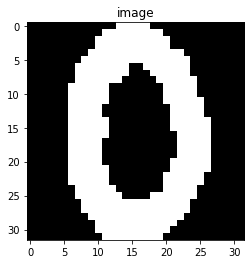

预测为： [6] 文件名为 ：  0_75.txt


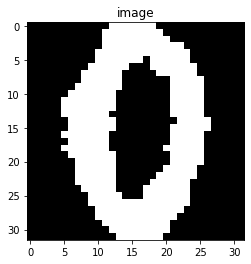

预测为： [8] 文件名为 ：  0_76.txt


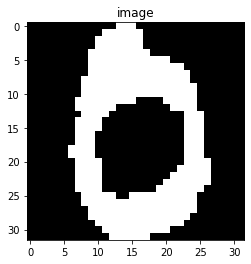

预测为： [1] 文件名为 ：  0_8.txt


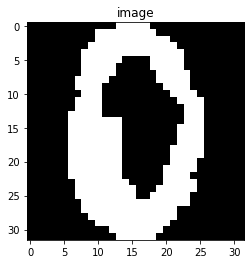

预测为： [5] 文件名为 ：  0_81.txt


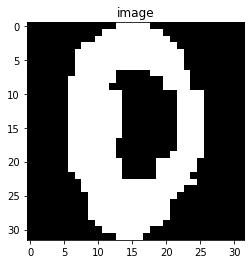

预测为： [1] 文件名为 ：  0_83.txt


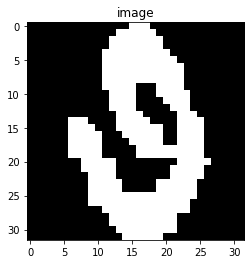

预测为： [5] 文件名为 ：  0_84.txt


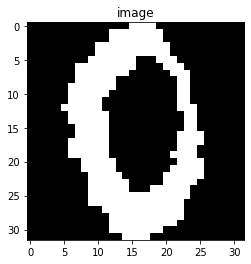

预测为： [1] 文件名为 ：  0_85.txt


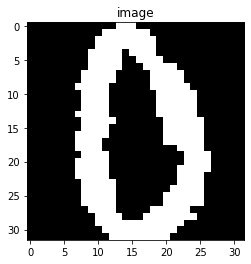

预测为： [8] 文件名为 ：  0_86.txt


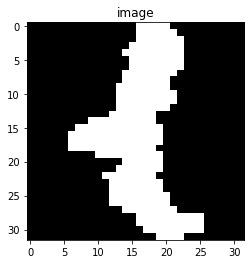

预测为： [0] 文件名为 ：  1_1.txt


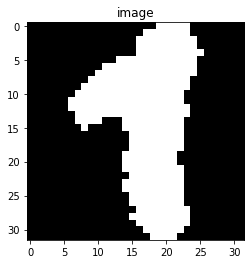

预测为： [8] 文件名为 ：  1_10.txt


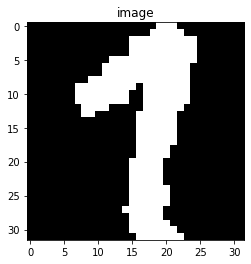

预测为： [9] 文件名为 ：  1_13.txt


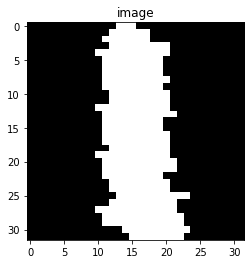

预测为： [0] 文件名为 ：  1_17.txt


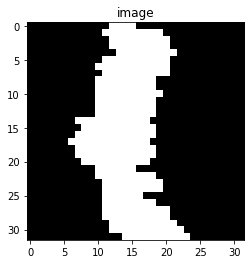

预测为： [5] 文件名为 ：  1_2.txt


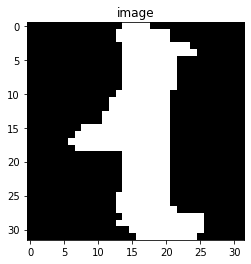

预测为： [0] 文件名为 ：  1_21.txt


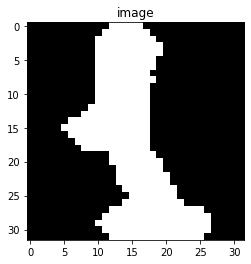

预测为： [0] 文件名为 ：  1_23.txt


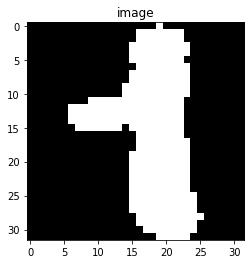

预测为： [8] 文件名为 ：  1_27.txt


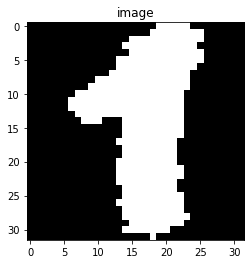

预测为： [8] 文件名为 ：  1_51.txt


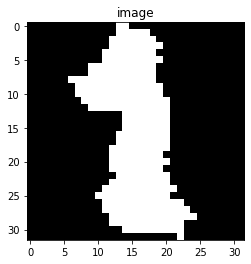

预测为： [0] 文件名为 ：  1_53.txt


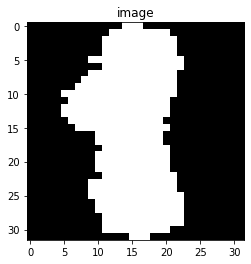

预测为： [0] 文件名为 ：  1_54.txt


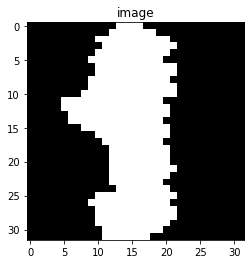

预测为： [8] 文件名为 ：  1_55.txt


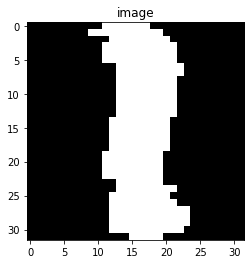

预测为： [0] 文件名为 ：  1_57.txt


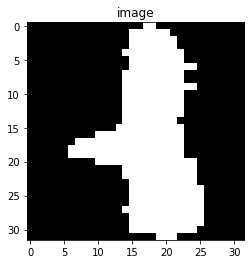

预测为： [8] 文件名为 ：  1_58.txt


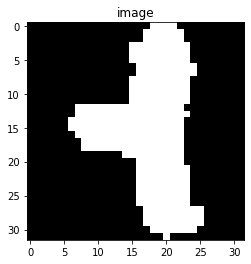

预测为： [4] 文件名为 ：  1_60.txt


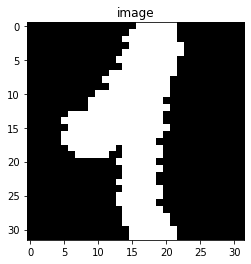

预测为： [4] 文件名为 ：  1_64.txt


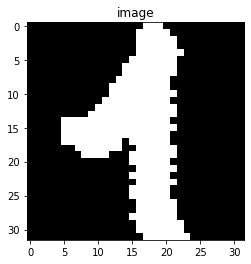

预测为： [4] 文件名为 ：  1_65.txt


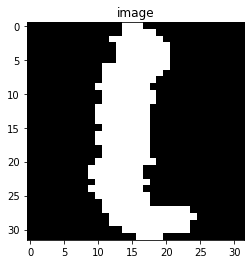

预测为： [0] 文件名为 ：  1_73.txt


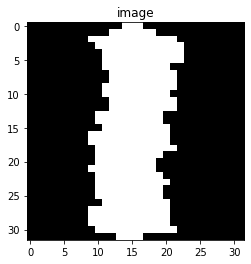

预测为： [0] 文件名为 ：  1_74.txt


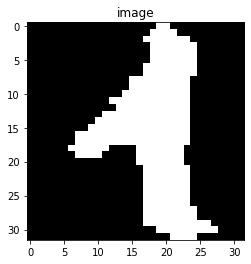

预测为： [4] 文件名为 ：  1_77.txt


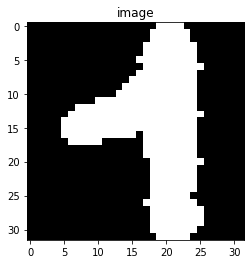

预测为： [4] 文件名为 ：  1_78.txt


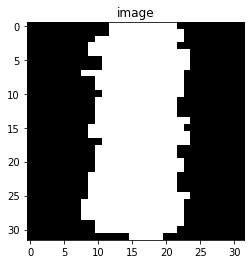

预测为： [0] 文件名为 ：  1_79.txt


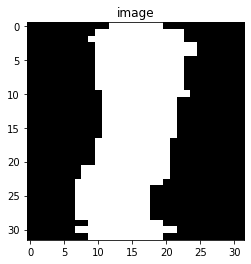

预测为： [0] 文件名为 ：  1_83.txt


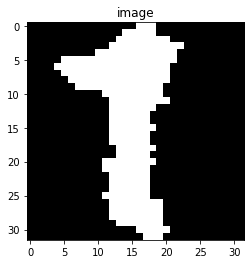

预测为： [8] 文件名为 ：  1_87.txt


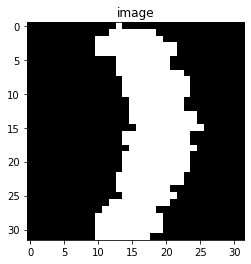

预测为： [8] 文件名为 ：  1_89.txt


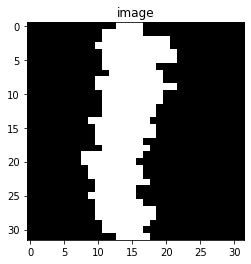

预测为： [0] 文件名为 ：  1_92.txt


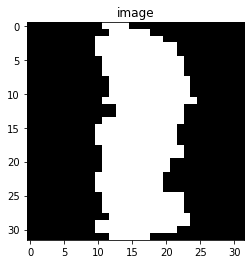

预测为： [8] 文件名为 ：  1_93.txt


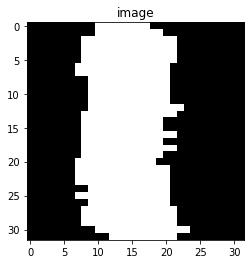

预测为： [8] 文件名为 ：  1_94.txt


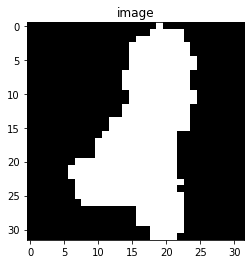

预测为： [4] 文件名为 ：  1_96.txt


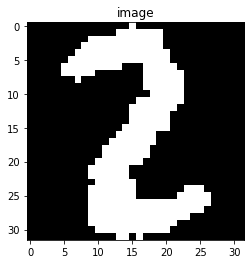

预测为： [3] 文件名为 ：  2_14.txt


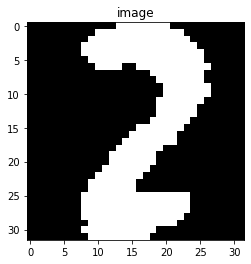

预测为： [5] 文件名为 ：  2_17.txt


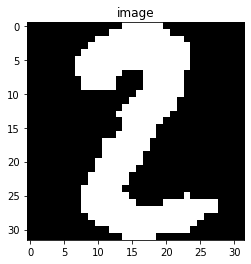

预测为： [5] 文件名为 ：  2_19.txt


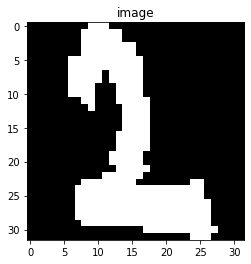

预测为： [1] 文件名为 ：  2_20.txt


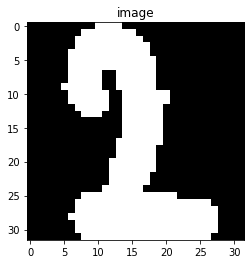

预测为： [9] 文件名为 ：  2_21.txt


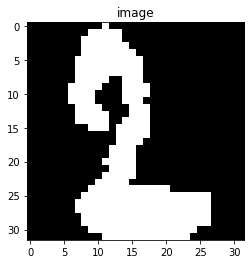

预测为： [1] 文件名为 ：  2_47.txt


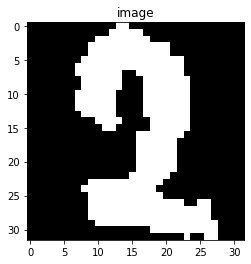

预测为： [9] 文件名为 ：  2_54.txt


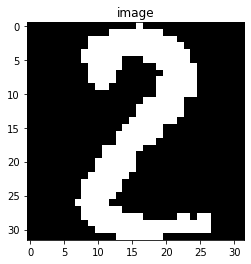

预测为： [3] 文件名为 ：  2_67.txt


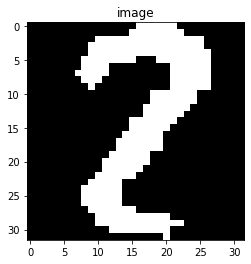

预测为： [8] 文件名为 ：  2_68.txt


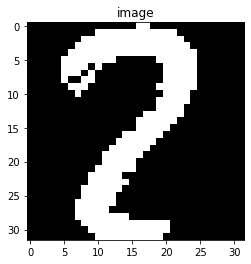

预测为： [7] 文件名为 ：  2_69.txt


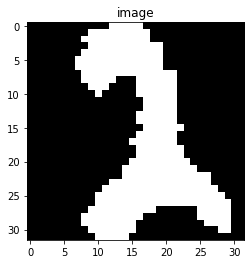

预测为： [0] 文件名为 ：  2_7.txt


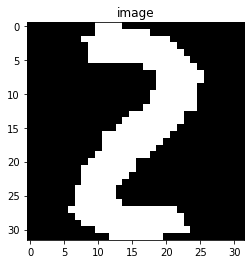

预测为： [3] 文件名为 ：  2_72.txt


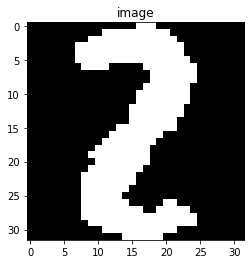

预测为： [5] 文件名为 ：  2_73.txt


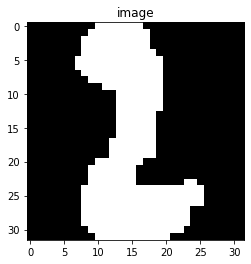

预测为： [0] 文件名为 ：  2_85.txt


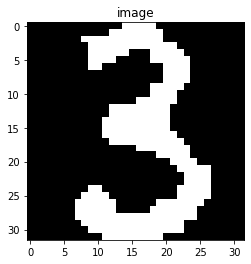

预测为： [9] 文件名为 ：  3_1.txt


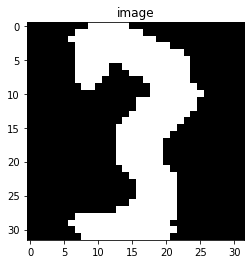

预测为： [2] 文件名为 ：  3_10.txt


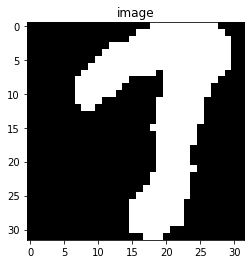

预测为： [8] 文件名为 ：  3_11.txt


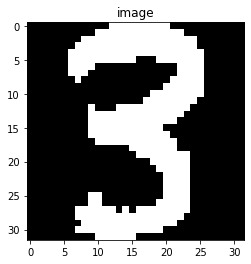

预测为： [5] 文件名为 ：  3_12.txt


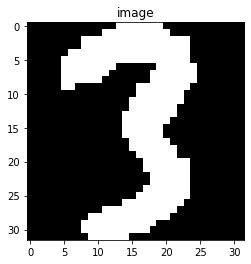

预测为： [5] 文件名为 ：  3_14.txt


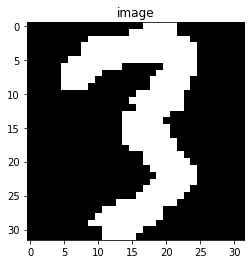

预测为： [5] 文件名为 ：  3_15.txt


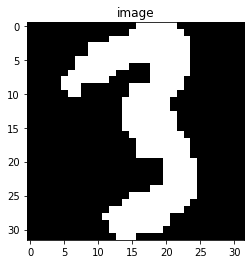

预测为： [5] 文件名为 ：  3_16.txt


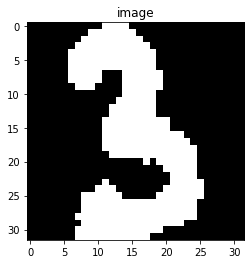

预测为： [9] 文件名为 ：  3_17.txt


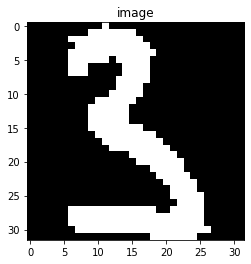

预测为： [2] 文件名为 ：  3_21.txt


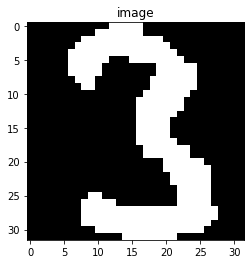

预测为： [2] 文件名为 ：  3_28.txt


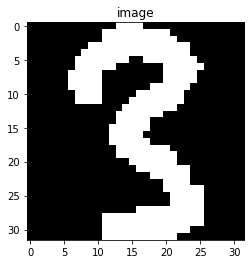

预测为： [8] 文件名为 ：  3_29.txt


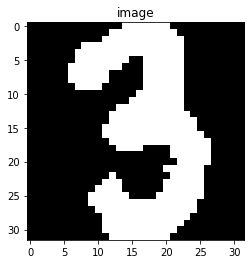

预测为： [5] 文件名为 ：  3_32.txt


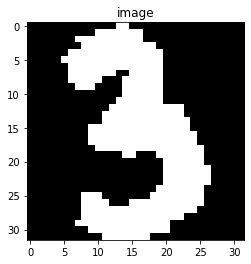

预测为： [5] 文件名为 ：  3_33.txt


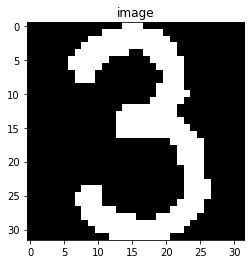

预测为： [5] 文件名为 ：  3_36.txt


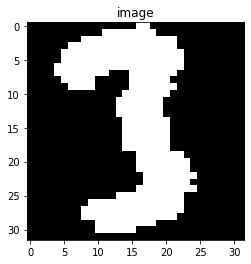

预测为： [0] 文件名为 ：  3_37.txt


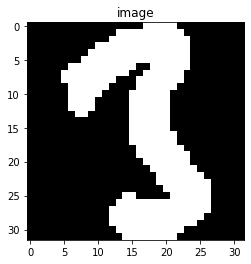

预测为： [5] 文件名为 ：  3_38.txt


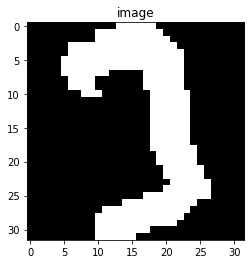

预测为： [5] 文件名为 ：  3_40.txt


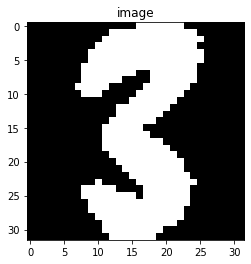

预测为： [8] 文件名为 ：  3_42.txt


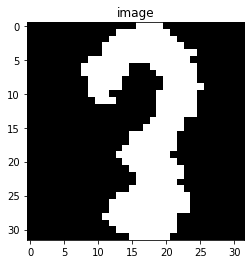

预测为： [0] 文件名为 ：  3_43.txt


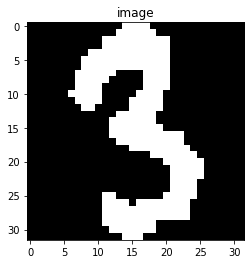

预测为： [9] 文件名为 ：  3_44.txt


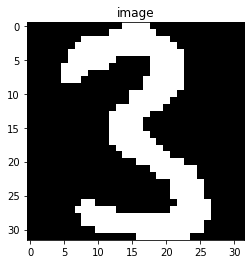

预测为： [2] 文件名为 ：  3_45.txt


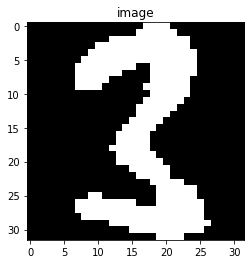

预测为： [2] 文件名为 ：  3_46.txt


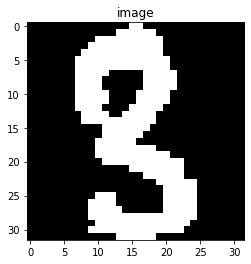

预测为： [1] 文件名为 ：  3_49.txt


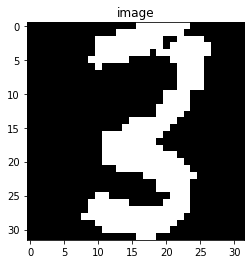

预测为： [5] 文件名为 ：  3_50.txt


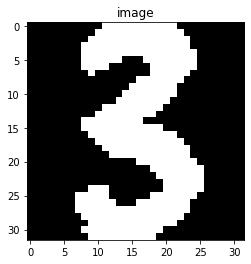

预测为： [8] 文件名为 ：  3_51.txt


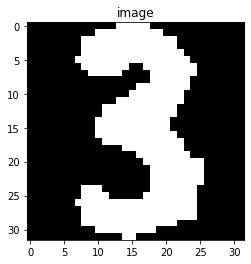

预测为： [8] 文件名为 ：  3_54.txt


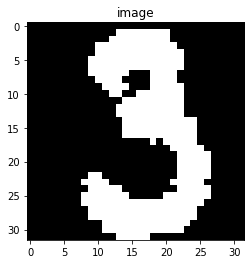

预测为： [2] 文件名为 ：  3_55.txt


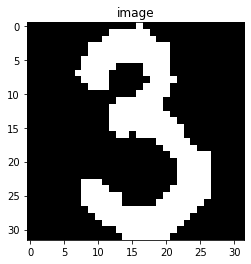

预测为： [0] 文件名为 ：  3_57.txt


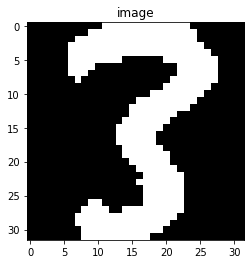

预测为： [5] 文件名为 ：  3_61.txt


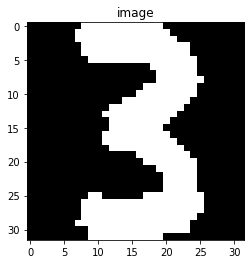

预测为： [8] 文件名为 ：  3_63.txt


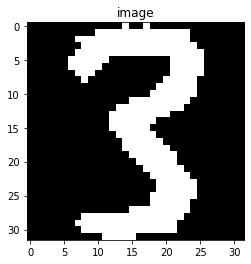

预测为： [5] 文件名为 ：  3_64.txt


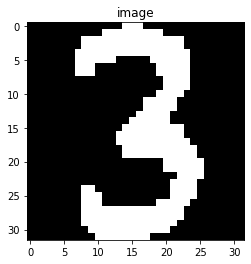

预测为： [5] 文件名为 ：  3_67.txt


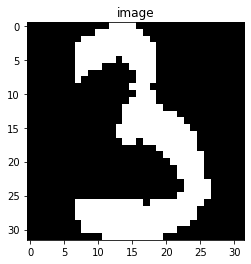

预测为： [9] 文件名为 ：  3_68.txt


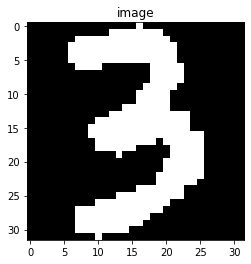

预测为： [5] 文件名为 ：  3_70.txt


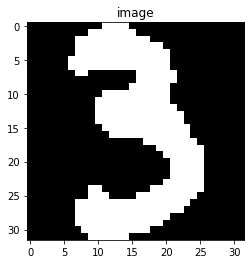

预测为： [5] 文件名为 ：  3_71.txt


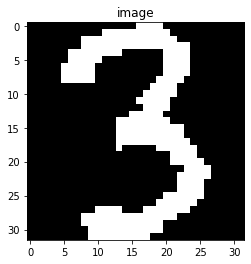

预测为： [5] 文件名为 ：  3_73.txt


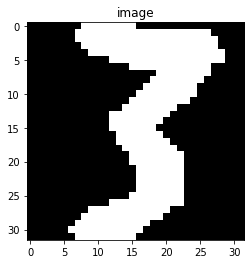

预测为： [5] 文件名为 ：  3_74.txt


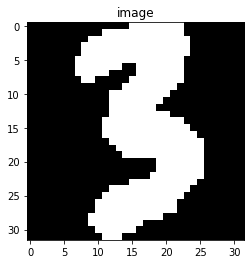

预测为： [5] 文件名为 ：  3_76.txt


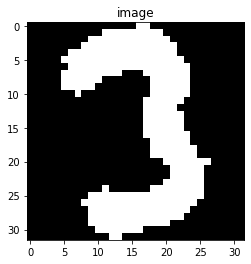

预测为： [2] 文件名为 ：  3_77.txt


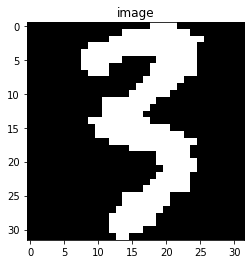

预测为： [7] 文件名为 ：  3_78.txt


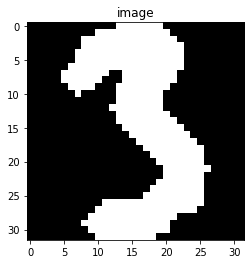

预测为： [5] 文件名为 ：  3_79.txt


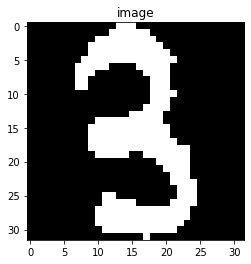

预测为： [9] 文件名为 ：  3_8.txt


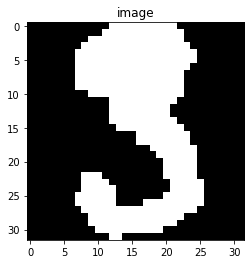

预测为： [5] 文件名为 ：  3_80.txt


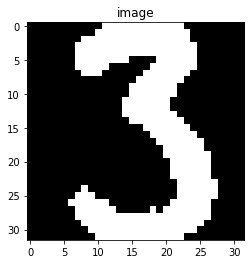

预测为： [2] 文件名为 ：  3_82.txt


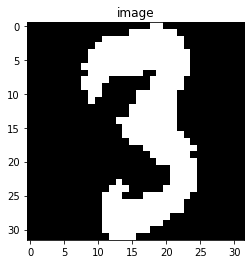

预测为： [5] 文件名为 ：  3_9.txt


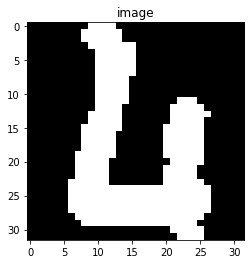

预测为： [6] 文件名为 ：  4_46.txt


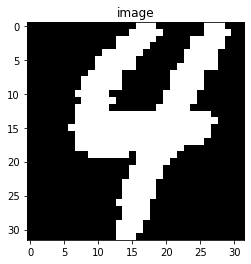

预测为： [9] 文件名为 ：  4_48.txt


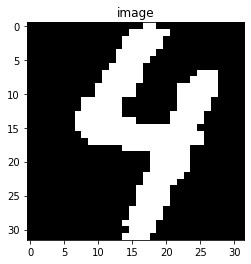

预测为： [1] 文件名为 ：  4_60.txt


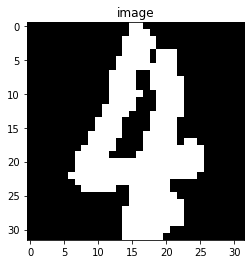

预测为： [1] 文件名为 ：  4_61.txt


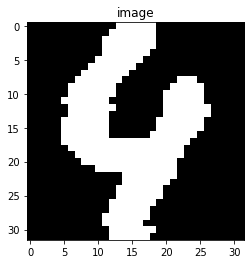

预测为： [1] 文件名为 ：  4_76.txt


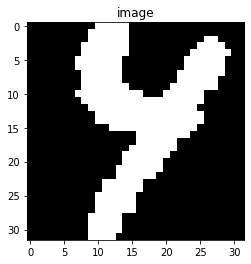

预测为： [1] 文件名为 ：  4_81.txt


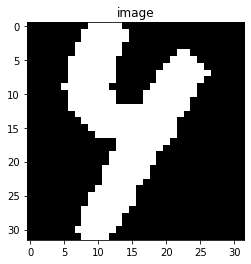

预测为： [1] 文件名为 ：  4_82.txt


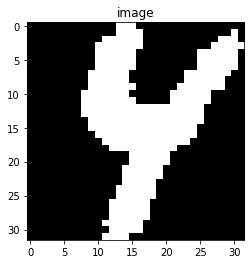

预测为： [9] 文件名为 ：  4_85.txt


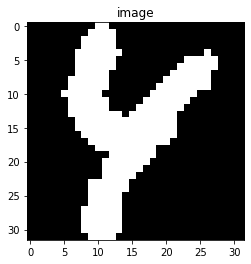

预测为： [1] 文件名为 ：  4_88.txt


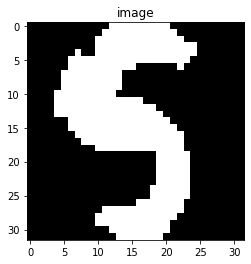

预测为： [9] 文件名为 ：  5_10.txt


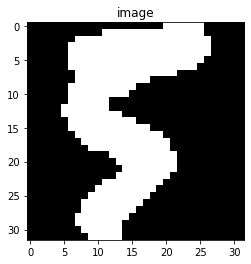

预测为： [7] 文件名为 ：  5_100.txt


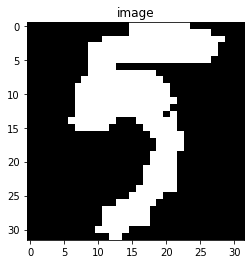

预测为： [9] 文件名为 ：  5_103.txt


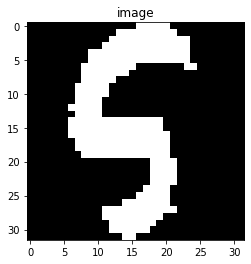

预测为： [3] 文件名为 ：  5_12.txt


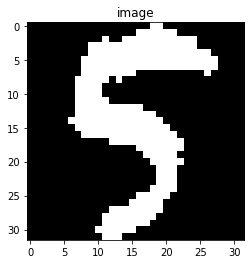

预测为： [7] 文件名为 ：  5_13.txt


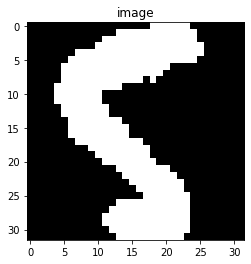

预测为： [3] 文件名为 ：  5_15.txt


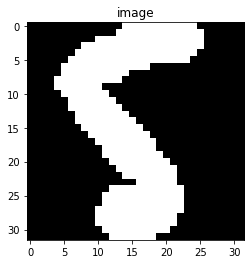

预测为： [3] 文件名为 ：  5_16.txt


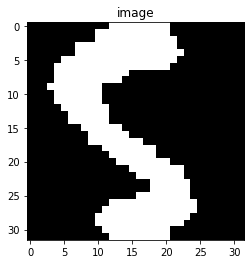

预测为： [3] 文件名为 ：  5_17.txt


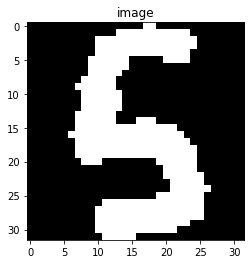

预测为： [3] 文件名为 ：  5_22.txt


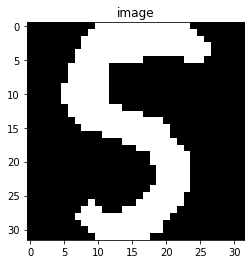

预测为： [3] 文件名为 ：  5_23.txt


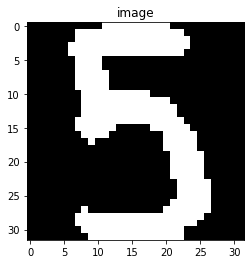

预测为： [3] 文件名为 ：  5_27.txt


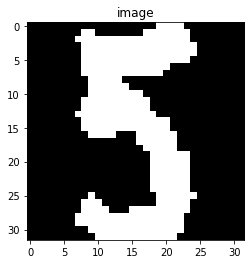

预测为： [0] 文件名为 ：  5_37.txt


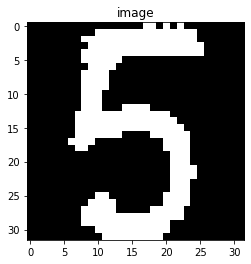

预测为： [3] 文件名为 ：  5_38.txt


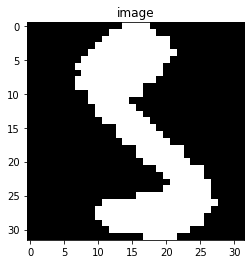

预测为： [3] 文件名为 ：  5_42.txt


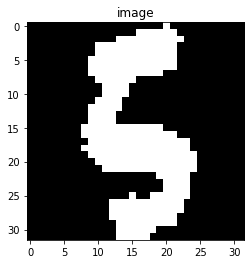

预测为： [6] 文件名为 ：  5_43.txt


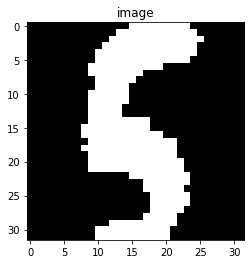

预测为： [7] 文件名为 ：  5_44.txt


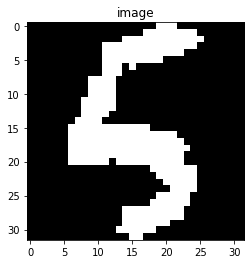

预测为： [3] 文件名为 ：  5_46.txt


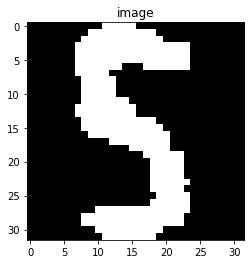

预测为： [3] 文件名为 ：  5_50.txt


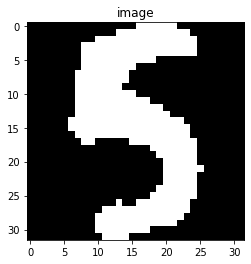

预测为： [9] 文件名为 ：  5_53.txt


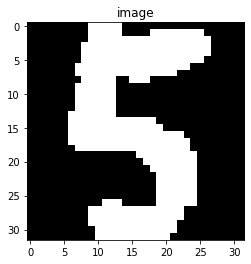

预测为： [3] 文件名为 ：  5_61.txt


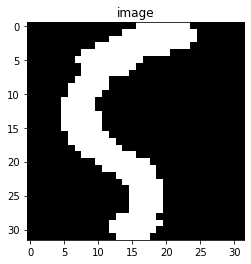

预测为： [7] 文件名为 ：  5_73.txt


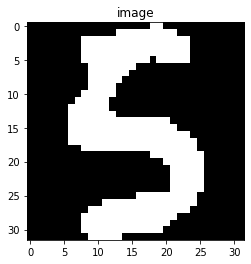

预测为： [3] 文件名为 ：  5_76.txt


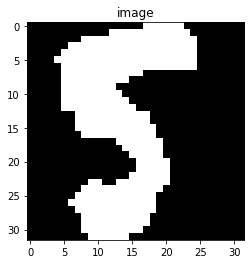

预测为： [3] 文件名为 ：  5_81.txt


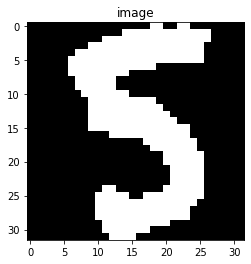

预测为： [3] 文件名为 ：  5_83.txt


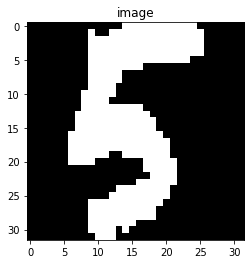

预测为： [3] 文件名为 ：  5_84.txt


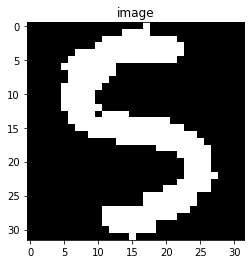

预测为： [3] 文件名为 ：  5_85.txt


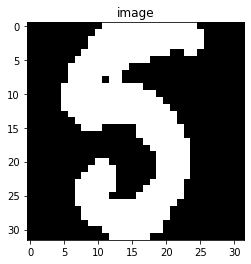

预测为： [8] 文件名为 ：  5_88.txt


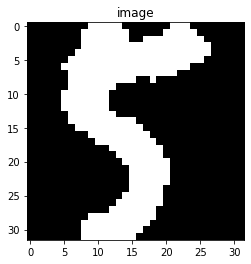

预测为： [7] 文件名为 ：  5_89.txt


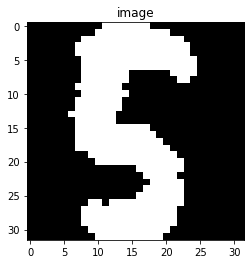

预测为： [3] 文件名为 ：  5_9.txt


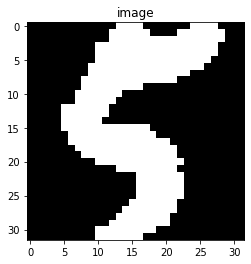

预测为： [7] 文件名为 ：  5_91.txt


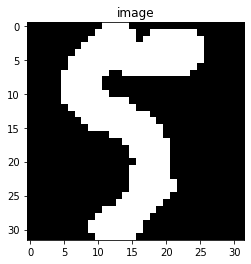

预测为： [7] 文件名为 ：  5_92.txt


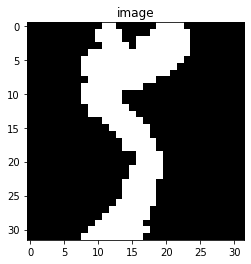

预测为： [7] 文件名为 ：  5_93.txt


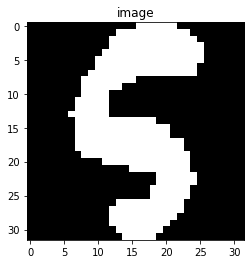

预测为： [0] 文件名为 ：  5_95.txt


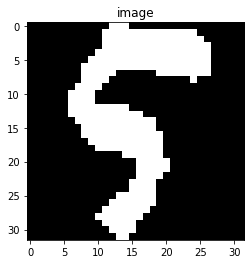

预测为： [7] 文件名为 ：  5_97.txt


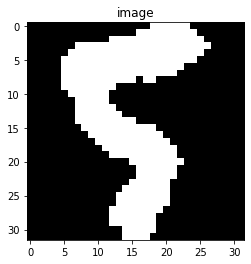

预测为： [7] 文件名为 ：  5_99.txt


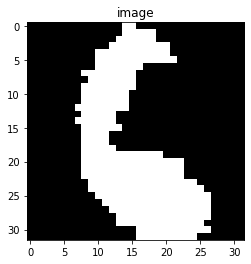

预测为： [0] 文件名为 ：  6_15.txt


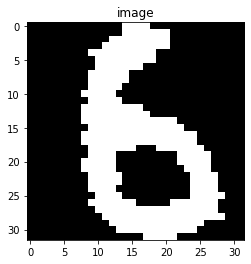

预测为： [3] 文件名为 ：  6_26.txt


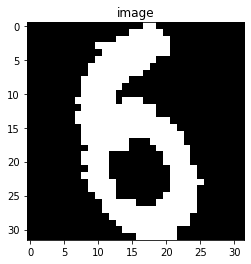

预测为： [5] 文件名为 ：  6_50.txt


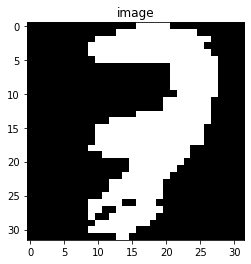

预测为： [5] 文件名为 ：  7_17.txt


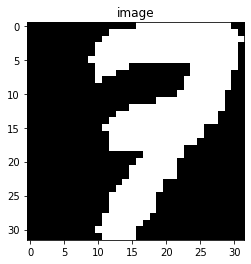

预测为： [5] 文件名为 ：  7_19.txt


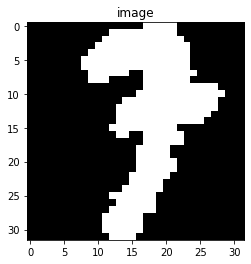

预测为： [9] 文件名为 ：  7_42.txt


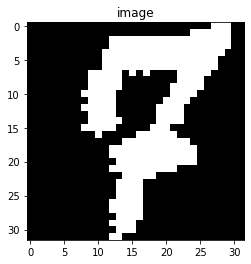

预测为： [5] 文件名为 ：  7_46.txt


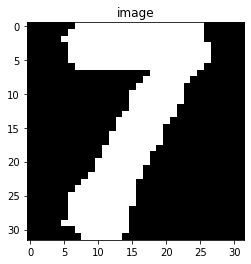

预测为： [5] 文件名为 ：  7_55.txt


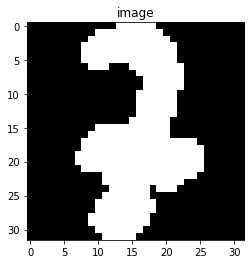

预测为： [0] 文件名为 ：  7_57.txt


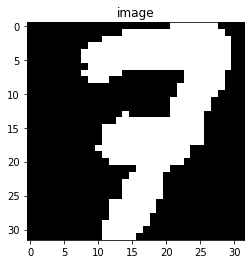

预测为： [5] 文件名为 ：  7_6.txt


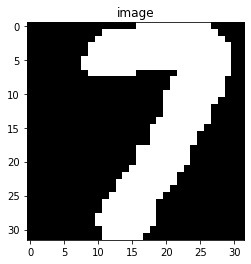

预测为： [5] 文件名为 ：  7_78.txt


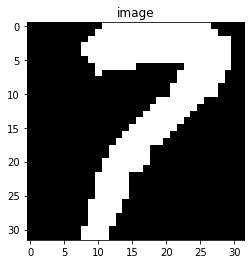

预测为： [5] 文件名为 ：  7_79.txt


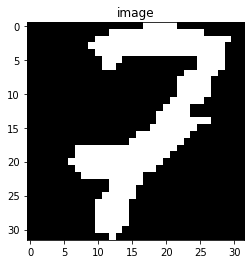

预测为： [5] 文件名为 ：  7_83.txt


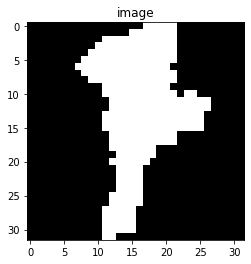

预测为： [9] 文件名为 ：  7_88.txt


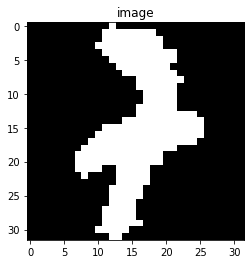

预测为： [4] 文件名为 ：  7_90.txt


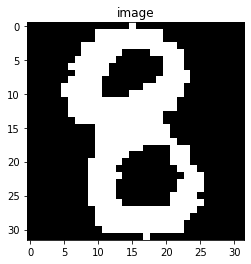

预测为： [9] 文件名为 ：  8_0.txt


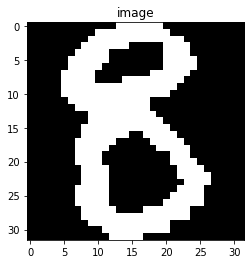

预测为： [0] 文件名为 ：  8_1.txt


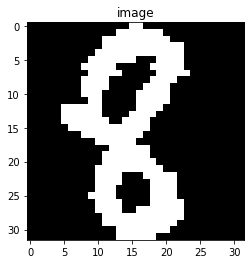

预测为： [5] 文件名为 ：  8_10.txt


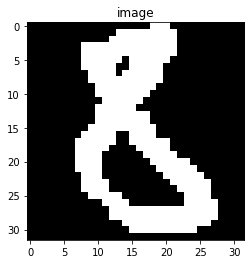

预测为： [1] 文件名为 ：  8_11.txt


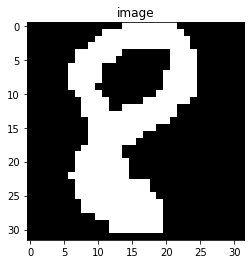

预测为： [1] 文件名为 ：  8_12.txt


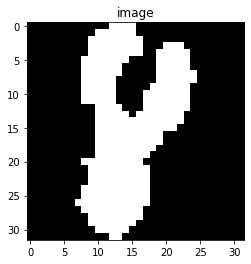

预测为： [9] 文件名为 ：  8_14.txt


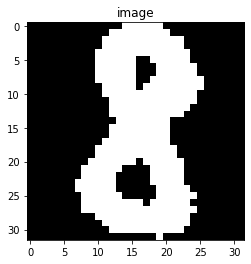

预测为： [1] 文件名为 ：  8_17.txt


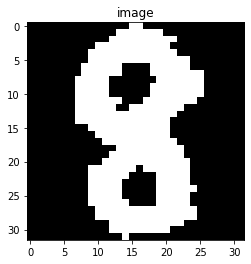

预测为： [0] 文件名为 ：  8_18.txt


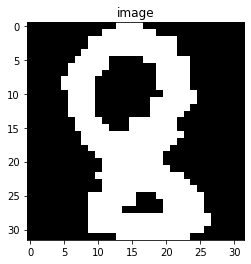

预测为： [6] 文件名为 ：  8_19.txt


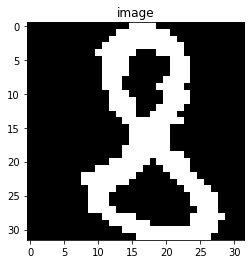

预测为： [1] 文件名为 ：  8_22.txt


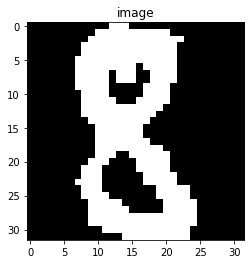

预测为： [3] 文件名为 ：  8_28.txt


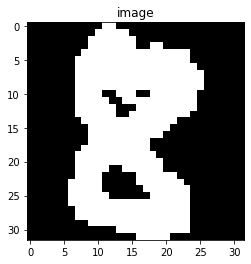

预测为： [0] 文件名为 ：  8_29.txt


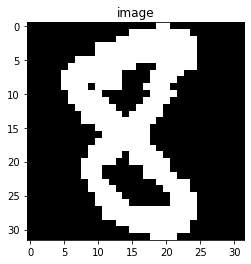

预测为： [3] 文件名为 ：  8_30.txt


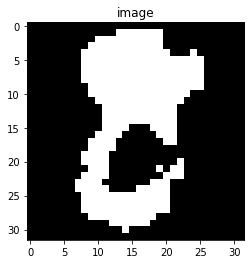

预测为： [3] 文件名为 ：  8_35.txt


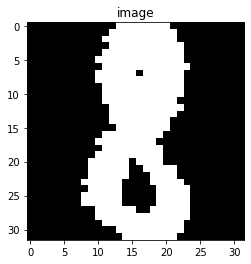

预测为： [0] 文件名为 ：  8_39.txt


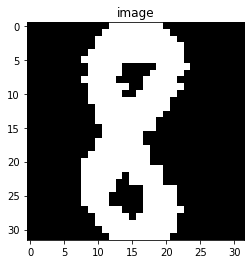

预测为： [0] 文件名为 ：  8_40.txt


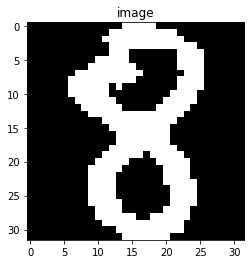

预测为： [1] 文件名为 ：  8_42.txt


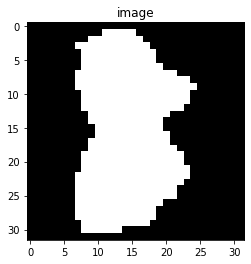

预测为： [1] 文件名为 ：  8_45.txt


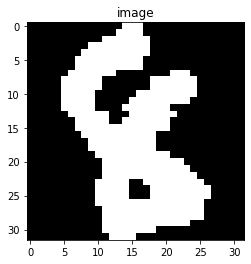

预测为： [1] 文件名为 ：  8_46.txt


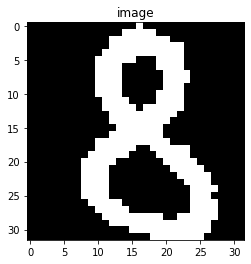

预测为： [1] 文件名为 ：  8_51.txt


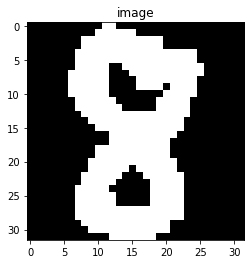

预测为： [1] 文件名为 ：  8_54.txt


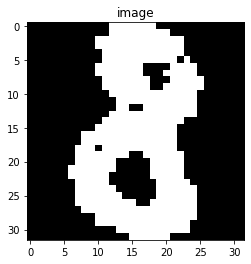

预测为： [0] 文件名为 ：  8_56.txt


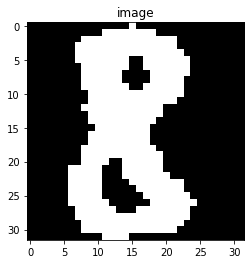

预测为： [1] 文件名为 ：  8_59.txt


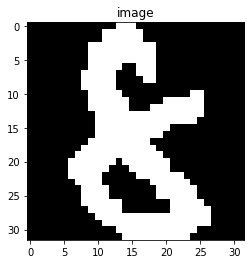

预测为： [6] 文件名为 ：  8_6.txt


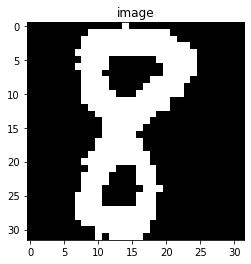

预测为： [9] 文件名为 ：  8_63.txt


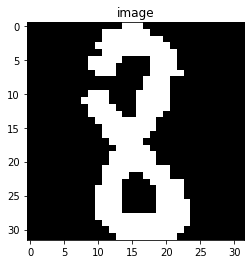

预测为： [0] 文件名为 ：  8_67.txt


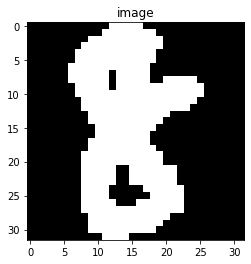

预测为： [1] 文件名为 ：  8_68.txt


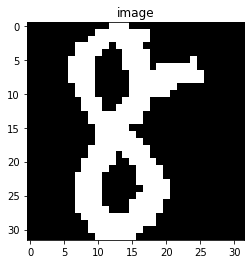

预测为： [1] 文件名为 ：  8_79.txt


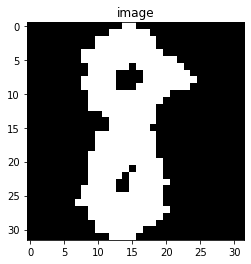

预测为： [0] 文件名为 ：  8_80.txt


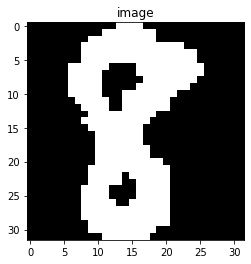

预测为： [0] 文件名为 ：  8_81.txt


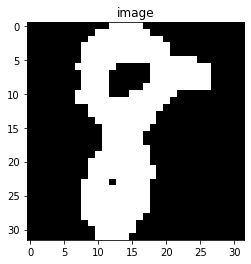

预测为： [1] 文件名为 ：  8_82.txt


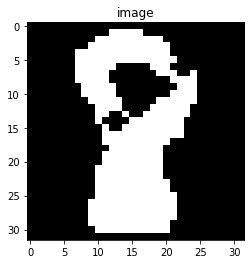

预测为： [0] 文件名为 ：  8_85.txt


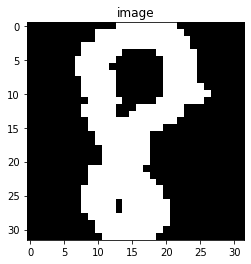

预测为： [1] 文件名为 ：  8_87.txt


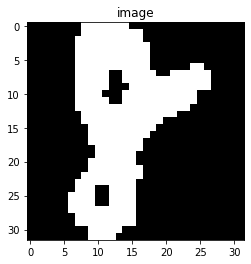

预测为： [1] 文件名为 ：  8_88.txt


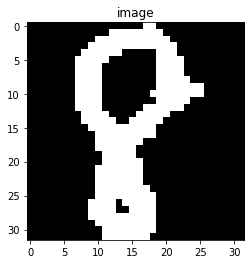

预测为： [0] 文件名为 ：  8_90.txt


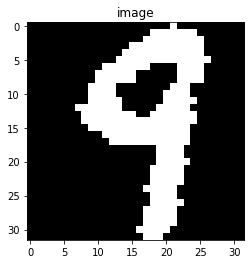

预测为： [8] 文件名为 ：  9_11.txt


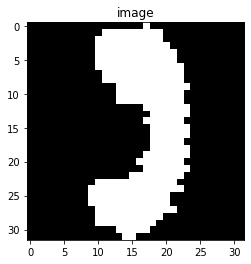

预测为： [6] 文件名为 ：  9_14.txt


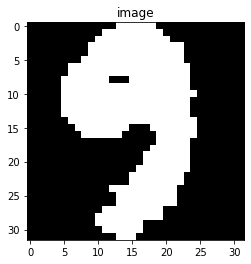

预测为： [8] 文件名为 ：  9_15.txt


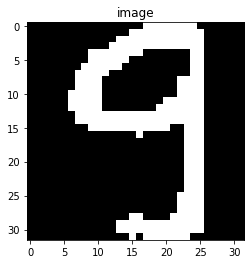

预测为： [5] 文件名为 ：  9_18.txt


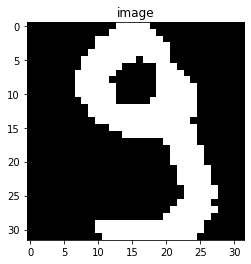

预测为： [8] 文件名为 ：  9_27.txt


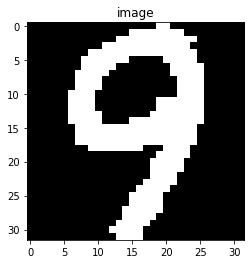

预测为： [7] 文件名为 ：  9_3.txt


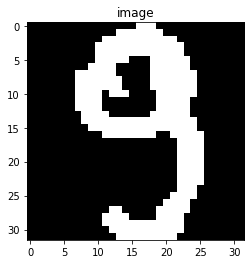

预测为： [8] 文件名为 ：  9_36.txt


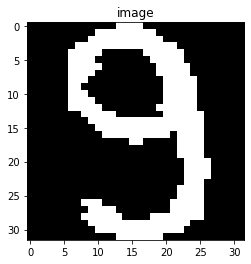

预测为： [5] 文件名为 ：  9_37.txt


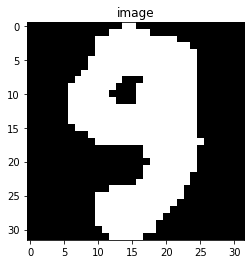

预测为： [8] 文件名为 ：  9_39.txt


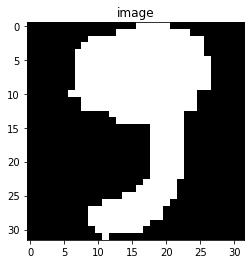

预测为： [3] 文件名为 ：  9_45.txt


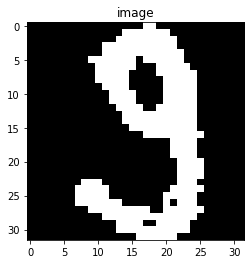

预测为： [2] 文件名为 ：  9_46.txt


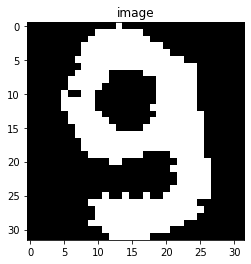

预测为： [8] 文件名为 ：  9_49.txt


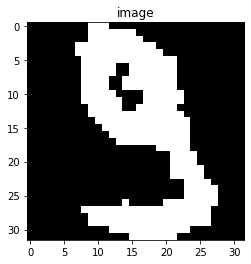

预测为： [3] 文件名为 ：  9_54.txt


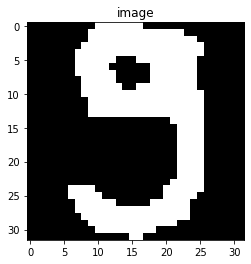

预测为： [5] 文件名为 ：  9_56.txt


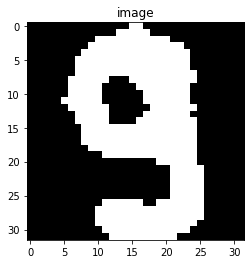

预测为： [3] 文件名为 ：  9_59.txt


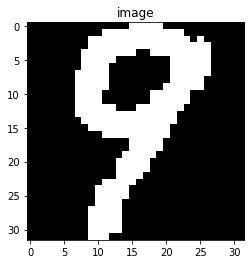

预测为： [7] 文件名为 ：  9_60.txt


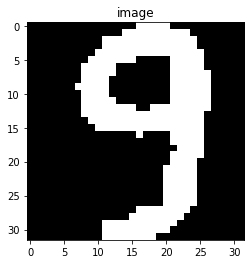

预测为： [5] 文件名为 ：  9_63.txt


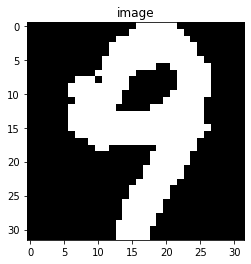

预测为： [4] 文件名为 ：  9_64.txt


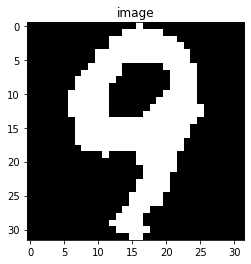

预测为： [1] 文件名为 ：  9_66.txt


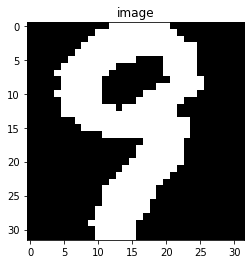

预测为： [4] 文件名为 ：  9_67.txt


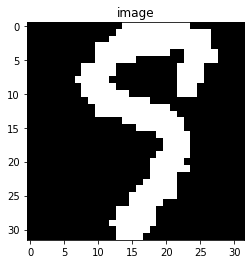

预测为： [7] 文件名为 ：  9_68.txt


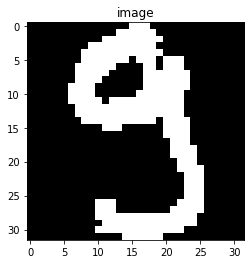

预测为： [5] 文件名为 ：  9_7.txt


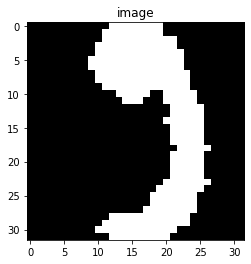

预测为： [5] 文件名为 ：  9_79.txt


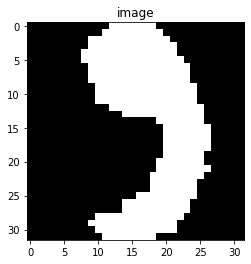

预测为： [8] 文件名为 ：  9_80.txt


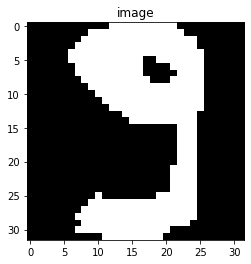

预测为： [5] 文件名为 ：  9_82.txt


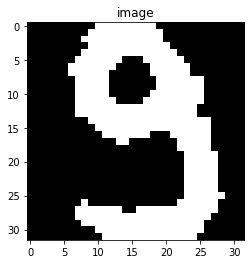

预测为： [3] 文件名为 ：  9_88.txt


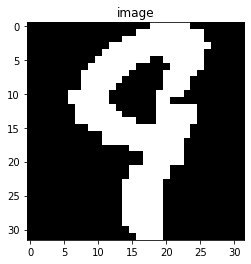

预测为： [7] 文件名为 ：  9_9.txt
总共错了232个数据
错误率为24.524313%


In [22]:
handwritingClassTestByCART_SUM()

# 参考文献 
[1] https://blog.csdn.net/asialee_bird/article/details/81051281?utm_source=app 

[2] 《统计学习方法》第 2 版，李航 

[3] https://www.jianshu.com/p/520cee795265 

[4] https://blog.csdn.net/liqiutuoyuan/article/details/77073689 